In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import fundamentalanalysis as fa
from datetime import datetime
import plotly.express as px
from datetime import date, timedelta
import numpy as np

FA_API_KEY = '85fe259a4ec6fad3cbe55a5ddaf7f9b4'
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter, YearLocator
import sqlite3
import pandas as pd
import sqlite3

In [3]:
def portfolio():
    # Reading in transactional data
    conn = sqlite3.connect("stock_transactions.db")
    query = "SELECT * FROM stock_transactions"
    df = pd.read_sql_query(query, conn)
    conn.close()

    # Data cleaning
    df['date'] = pd.to_datetime(df['date'])
    df["date"] = df["date"].dt.tz_localize("America/New_York")

    current_holdings_shares = []
    current_holdings = []

    # Initialising dataframe
    data = pd.DataFrame(columns = ['total_portfolio_value', 'cash_balance'])

    for i in range(len(df)):
        if df['ticker'][i] not in current_holdings:
            current_holdings.append(df['ticker'][i])
            stock = yf.Ticker(df['ticker'][i])
            stock_data = stock.history(start = df['date'][i])
            data[df['ticker'][i]] = stock_data['Close'] * df['units'][i]
        
        else:
            stock = yf.Ticker(df['ticker'][i])
            stock_data = stock.history(start = df['date'][i])
            temp_data = pd.DataFrame()
            if df['action'][i] == 'Buy':
                temp_data[df['ticker'][i]] = stock_data['Close']*df['units'][i]
            else: 
                temp_data[df['ticker'][i]] = stock_data['Close']*df['units'][i]*-1

            data = pd.merge(data, temp_data, left_index=True, right_index=True, how="outer", suffixes = ('_df1', '_df2'))
            data.fillna(0, inplace=True)
            data[df['ticker'][i]] = data[df['ticker'][i] + '_df1'] + data[df['ticker'][i] + '_df2']
            data = data.drop(columns = [df['ticker'][i] + '_df1', df['ticker'][i] + '_df2'])

    data.fillna(0, inplace = True)

    data['total_portfolio_value'] = data.sum(axis=1)

    # Adding cash balance
    for i in range(len(df)):
        cash_to_add = round(df['units'][i] * df['price'][i], 2)
        if df['action'][i] == 'Sell':
            cash_to_add = cash_to_add * -1
        data.loc[data.index >= df['date'][i], "cash_balance"] += cash_to_add

    fig, ax = plt.subplots(figsize=(10, 5)) # set the figsize parameter to increase the width of the plot
    ax.plot(data.index, data['total_portfolio_value'], label='Total Portfolio Value')
    ax.plot(data.index, data['cash_balance'], linestyle='--', color='black', label='Cash Balance')

    # set the x-axis tick locator and formatter to show only the years
    years = YearLocator()
    year_format = DateFormatter('%Y')
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(year_format)

    ax.set_xlabel("Date")
    ax.set_ylabel("Value ($)")
    ax.set_title("Portfolio Value Over Time")
    ax.legend()

    return data

In [4]:
data = portfolio()
data

NameError: name 'sqlite3' is not defined

In [ ]:
def portfolio(tickers, shares, date_purchased):
    data = pd.DataFrame()
    for i in range(len(tickers)):
        stock = yf.Ticker(tickers[i])
        stock_data = stock.history(start = date_purchased[i])
        stock_data[tickers[i]] = stock_data['Close'] * shares[i]
        data = pd.concat([data, stock_data[tickers[i]]], axis = 1)

    data['total_portfolio_value'] = data.sum(axis=1)
    fig, ax = plt.subplots(figsize=(10, 5)) # set the figsize parameter to increase the width of the plot
    ax.plot(data.index, data['total_portfolio_value'], label='Total Portfolio Value')
 
    months = MonthLocator(bymonth = [1, 4, 7, 10])
    month_format = DateFormatter('%b %Y')
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(month_format)

    month_format = DateFormatter('%b %y')
    ax.xaxis.set_major_formatter(month_format)

    ax.set_xlabel('Date')
    ax.set_ylabel('Portfolio Value ($)')

    return fig

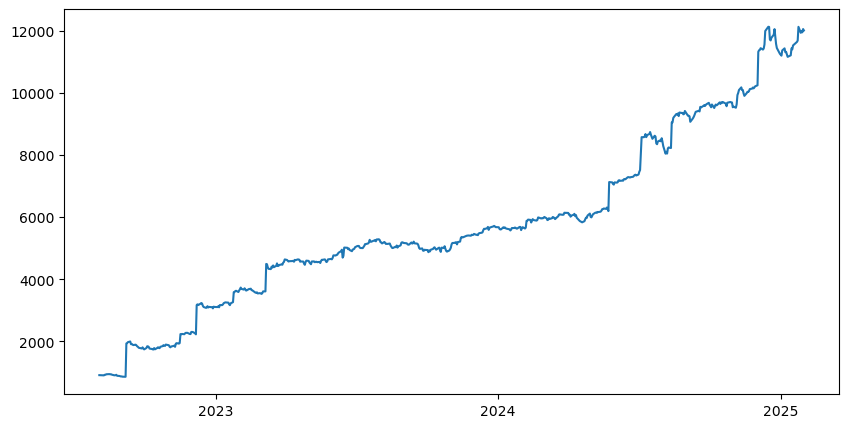

In [26]:
# Working version

for i in range(len(df)):
    if df['ticker'][i] not in current_holdings:
        current_holdings.append(df['ticker'][i])
        stock = yf.Ticker(df['ticker'][i])
        stock_data = stock.history(start = df['date'][i])
        data[df['ticker'][i]] = stock_data['Close'] * df['units'][i]
    
    else:
        stock = yf.Ticker(df['ticker'][i])
        stock_data = stock.history(start = df['date'][i])
        temp_data = pd.DataFrame()
        if df['action'][i] == 'Buy':
            temp_data[df['ticker'][i]] = stock_data['Close']*df['units'][i]
        else: 
            temp_data[df['ticker'][i]] = stock_data['Close']*df['units'][i]*-1

        data = pd.merge(data, temp_data, left_index=True, right_index=True, how="outer", suffixes = ('_df1', '_df2'))
        data.fillna(0, inplace=True)
        data[df['ticker'][i]] = data[df['ticker'][i] + '_df1'] + data[df['ticker'][i] + '_df2']
        data = data.drop(columns = [df['ticker'][i] + '_df1', df['ticker'][i] + '_df2'])

data.fillna(0, inplace = True)

data['total_portfolio_value'] = data.sum(axis=1)







plt.show()

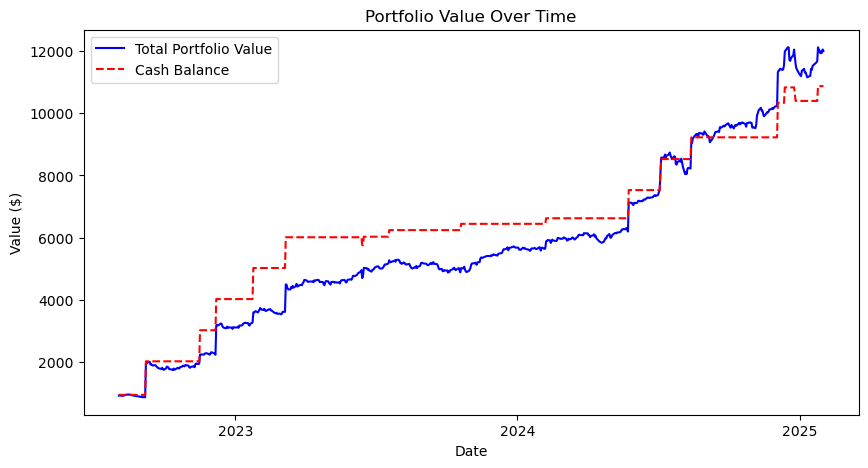

In [27]:
fig, ax = plt.subplots(figsize=(10, 5))  # Set figure size

# Plot total portfolio value as a solid line
ax.plot(data.index, data['total_portfolio_value'], label='Total Portfolio Value', color='blue')

# Plot cash balance as a dotted line
ax.plot(data.index, data['cash_balance'], linestyle='--', color='red', label='Cash Balance')

# Set the x-axis tick locator and formatter to show only the years
years = YearLocator()
year_format = DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(year_format)

# Add labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Value ($)")
ax.set_title("Portfolio Value Over Time")
ax.legend()

# Show the plot
plt.show()

In [1]:
data

NameError: name 'data' is not defined